In [45]:
#import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.8)

import warnings
#warnings.SettingWithCopyWarning
pd.options.mode.chained_assignment = None

#read the collected 
df_init = pd.read_csv('final_movie_data.csv',index_col=0)

df = df_init.copy()
df.head(2)

,title,budget,revenue,genres,production_countries,production_companies,adult,popularity,original_language,release_date,runtime,vote_average,vote_count
0,Independence Day,75000000,817400891,"Action, Adventure, Science Fiction",United States of America,"Centropolis Entertainment, 20th Century Fox",False,17.068,en,1996-06-25,145.0,6.8,5595
1,The Matrix,63000000,463517383,"Action, Science Fiction","Australia, United States of America","Village Roadshow Pictures, Groucho II Film Par...",False,35.721,en,1999-03-30,136.0,8.1,14757


In [46]:
#####preprocessing#####

#fill missing values for run time with median
df.runtime.fillna(df_init.runtime.median(),inplace=True)

#fill mising values with 'missing'
df.genres.fillna('missing',inplace=True)
df.production_countries.fillna('missing',inplace=True)
df.production_companies.fillna('missing',inplace=True)

#rescale bugdet to list in million $
scale = 10**6
df['budget_M'] = df['budget'].div(scale)
df['revenue_M'] = df['revenue'].div(scale)

#total budget in million $ and %
df['return_M'] = df.revenue_M - df.budget_M
df['return_%'] = round(df.return_M/df.budget_M * 100, 2)

#add year column
df.release_date = df.release_date.astype('datetime64[ns]')
df['year'] = df.release_date.dt.year.fillna(0).astype('int64')

#add first genre column
df['first_genre'] = [x.split(', ')[0] if x is not np.nan 
                                           else np.nan for x in df.genres]
#add first company column
df['first_company'] = [x.split(', ')[0] if x is not np.nan 
                                             else np.nan for x in df.production_companies]
#add first country column
df['first_country'] = [x.split(', ')[0] if x is not np.nan 
                                             else np.nan for x in df.production_countries]

#select necessary columns
df = df[['title','year','first_genre','first_country','first_company'
              ,'budget_M','revenue_M','return_M','return_%'
              ,'runtime','popularity','vote_average', 'vote_count']]   


df.head()

,title,year,first_genre,first_country,first_company,budget_M,revenue_M,return_M,return_%,runtime,popularity,vote_average,vote_count
0,Independence Day,1996,Action,United States of America,Centropolis Entertainment,75.0,817.400891,742.400891,989.87,145.0,17.068,6.8,5595
1,The Matrix,1999,Action,Australia,Village Roadshow Pictures,63.0,463.517383,400.517383,635.74,136.0,35.721,8.1,14757
2,The Matrix Reloaded,2003,Adventure,Australia,Heineken Branded Entertainment,150.0,738.599701,588.599701,392.40,138.0,24.442,6.9,5852
3,The Matrix Revolutions,2003,Adventure,United States of America,Silver Pictures,150.0,424.988211,274.988211,183.33,129.0,22.937,6.6,5261
4,Out of Africa,1985,History,United States of America,Universal Pictures,31.0,128.499205,97.499205,314.51,161.0,11.758,7.3,608


In [47]:
df.describe(include=['object'])

,title,first_genre,first_country,first_company
count,5390,5390,5390,5390
unique,5312,20,82,2322
top,The Three Musketeers,Drama,United States of America,missing
freq,3,1305,2975,450


In [48]:
df[df.title == 'The Three Musketeers']

,title,year,first_genre,first_country,first_company,budget_M,revenue_M,return_M,return_%,runtime,popularity,vote_average,vote_count
275,The Three Musketeers,0,missing,missing,missing,0.00003,0.000053,0.000023,76.67,105.0,0.600,0.0,0
336,The Three Musketeers,1993,Action,United States of America,Walt Disney Pictures,30.00000,53.898845,23.898845,79.66,105.0,11.243,6.3,411
199,The Three Musketeers,2011,Adventure,United States of America,Studio Babelsberg,75.00000,132.274484,57.274484,76.37,110.0,6.524,5.7,1638


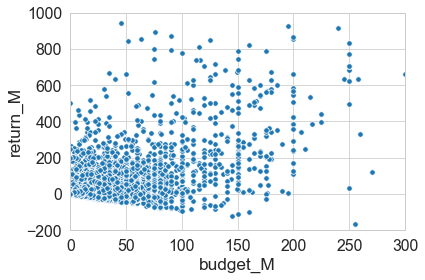

In [52]:
#How budget influence on total revenue in millions?
fig, ax1 = plt.subplots(1,1,figsize=(6,4))

sns.scatterplot(x='budget_M', y='return_M', data=df, s=30, ax=ax1)

ax1.set_xlim(0,300)
_ = ax1.set_ylim(-200,1000)